In [1]:
import pandas as pd

df = pd.read_csv("./data/Epic Fantasy.csv")

print(list(df.columns))

['Unnamed: 0', 'name', 'author', 'number of ratings', 'url', 'avg_ratings', 'id', 'Num_pages', 'Awards', 'Genre', 'OriginalPDate']


In [2]:
df.rename(columns={'name':'Title', 'OriginalPDate':'Publishdate',  'author':'Author'}, inplace=True)
print(list(df.columns))

['Unnamed: 0', 'Title', 'Author', 'number of ratings', 'url', 'avg_ratings', 'id', 'Num_pages', 'Awards', 'Genre', 'Publishdate']


In [3]:
df.head(2)

,Unnamed: 0,Title,Author,number of ratings,url,avg_ratings,id,Num_pages,Awards,Genre,Publishdate
0,0.0,"A Game of Thrones (A Song of Ice and Fire, #1)",George R.R. Martin,"2,047,731",https://www.goodreads.com//book/show/13496.A_G...,4.45,0.0,835 pages,"['Nebula Award Nominee for Best Novel (1997)',...","['Fantasy', 'Fiction', 'Fantasy', 'Epic Fantas...",['\n (first published August 6th ...
1,1.0,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit ...,J.R.R. Tolkien,"112,472",https://www.goodreads.com//book/show/30.J_R_R_...,4.60,1.0,Hobbit Movie Tie-in Boxed set,[],"['Fantasy', 'Fiction', 'Classics', 'Adventure'...",['\n (first published October 20t...


In [4]:
import pandas as pd
import numpy as np

def preprocessing():
    df = pd.read_csv("./data/Epic Fantasy.csv")
    df.rename(columns={'name':'Title', 'OriginalPDate':'Publishdate', 'author':'Author'}, inplace=True)
    
    
    
    # cleaning the Title
    df['Title'] = df['Title'].str.strip()
    
    # Calculating number of awards
    df['Awards'] = df['Awards'].str.strip('[]')
    df['Awards'] = df['Awards'].replace(r'^\s*$', np.NaN, regex=True)
    df['Awards_x'] = df.Awards.str.split(',')
    df['award_count'] = df['Awards_x'].str.len()
    df['award_count'] = df['award_count'].fillna(0)
    df['award_count'] = df['award_count'].astype(int)
    df = df.drop(['Awards_x'], axis= 1)
    
    # Cleaning author column from paranthesis text
    df['Author'] = df.Author.str.replace(r"\(.*Goodreads Author\)","")

    # cleaning number of ratings
    #df.rename(columns={'Ratings': 'number of ratings'}, inplace=True)
    df['number of ratings'] = df['number of ratings'].str.replace('[,]',"")
    df['number of ratings'] = df['number of ratings'].str.replace('[^0-9]',"0")
    df['number of ratings'] = df['number of ratings'].fillna(0)
    df['number of ratings'] = df['number of ratings'].astype(int)
    
    # cleaning avg_rat
    #df['avg_ratings'] = df.avg_ratings.str.replace('[^0-9.]',"")
    df['avg_ratings'] = df['avg_ratings'].replace(r'^\s*$', np.NaN, regex=True)
    df['avg_ratings'] = df['avg_ratings'].astype(float)
    
    # cleaning Genre
    df['Genre'] = df['Genre'].str.strip('[]')
    #df['Genre'] = df['Genre'].replace('[,]', '')
    
    # Cleaning pages column from text
    df['Num_pages'] = df.Num_pages.str.replace('[^0-9]',"")
    #df['Num_pages'] = df['Num_pages'].replace(r'^\s*$', np.NaN, regex=True)
    df['Num_pages'] = pd.to_numeric(df['Num_pages'])
    
    # Cleaning publish year
    df.rename(columns={' Publishdate': 'Publishdate'}, inplace=True)
    df['Publishdate'] = df.Publishdate.str.replace('[^0-9-]',"")
    df['Publishdate'] = df['Publishdate'].replace(r'^\s*$', np.NaN, regex=True)
    df['original_publish_year'] = df['Publishdate'].str[-4:]
    df = df.drop(['Publishdate'], axis= 1)

    # Calculating normalized ratings
    df['minmax_norm_ratings'] = 1 + (df['avg_ratings'] - df.avg_ratings.min()) / (df.avg_ratings.max()-df.avg_ratings.min()) *9
    df['mean_norm_ratings'] = 1 + (df['avg_ratings'] - df.avg_ratings.mean()) / (df.avg_ratings.max()-df.avg_ratings.min()) *9
    
    return df

preprocessing()

,Unnamed: 0,Title,Author,number of ratings,url,avg_ratings,id,Num_pages,Awards,Genre,award_count,original_publish_year,minmax_norm_ratings,mean_norm_ratings
0,0.0,"A Game of Thrones (A Song of Ice and Fire, #1)",George R.R. Martin,2047731,https://www.goodreads.com//book/show/13496.A_G...,4.45,0.0,835.0,"'Nebula Award Nominee for Best Novel (1997)', ...","'Fantasy', 'Fiction', 'Fantasy', 'Epic Fantasy...",4,1996,8.088496,2.410433
1,1.0,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,112472,https://www.goodreads.com//book/show/30.J_R_R_...,4.60,1.0,NaN,NaN,"'Fantasy', 'Fiction', 'Classics', 'Adventure',...",0,1955,8.685841,3.007778
2,2.0,The Name of the Wind (The Kingkiller Chronicle...,Patrick Rothfuss,739671,https://www.goodreads.com//book/show/186074.Th...,4.52,2.0,662.0,'Locus Award Nominee for Best First Novel and ...,"'Fantasy', 'Fiction', 'Fantasy', 'Epic Fantasy...",8,2007,8.367257,2.689194
3,3.0,"The Way of Kings (The Stormlight Archive, #1)",Brandon Sanderson,319885,https://www.goodreads.com//book/show/7235533-t...,4.62,3.0,1007.0,'Locus Award Nominee for Best Fantasy Novel (2...,"'Fantasy', 'Fiction', 'Fantasy', 'Epic Fantasy...",4,NaN,8.765487,3.087424
4,4.0,The Chronicles of Narnia (Chronicles of Narnia...,C.S. Lewis,533099,https://www.goodreads.com//book/show/11127.The...,4.26,4.0,NaN,NaN,"'Fantasy', 'Classics', 'Fiction', 'Young Adult...",0,1956,7.331858,1.653795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1094,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1095,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1096,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


In [5]:
# Analyse exercise from day 1

def analyse_highest_book(df, a):
    df_a = df.dropna(subset= ['minmax_norm_ratings'])
    dp = df_a.groupby(df_a.original_publish_year).agg({'minmax_norm_ratings': np.mean})
    dp = dp.rename(columns={'minmax_norm_ratings': 'minmax_norm_ratings_mean'})
    author_group = df.loc[df['Author'] == a]
    book_max_rating = author_group.iloc[author_group['minmax_norm_ratings'].argmax()]['Title']
        
    print(book_max_rating)
    return dp

print(analyse_highest_book(preprocessing(), 'J.R.R. Tolkien'))

J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings
                       minmax_norm_ratings_mean
original_publish_year                          
-750                                   5.778761
-800                                   5.380531
1010                                   8.367257
1410                                   6.097345
1485                                   5.977876
...                                         ...
2016                                   6.085967
2017                                   8.506637
2018                                   7.039823
2020                                   9.561947
900                                    4.146018

[86 rows x 1 columns]


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
from matplotlib.ticker import MaxNLocator

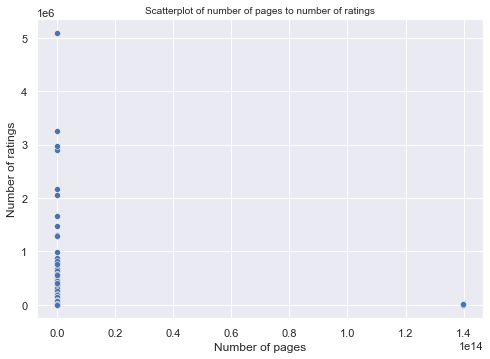

In [23]:
# 1. Create a 2D scatterplot with pages on the x-axis and num_ratings on the y-axis.

df_s = preprocessing().dropna(subset= ['Num_pages', 'number of ratings'])
_= sns.scatterplot(data=df_s, x="Num_pages", y="number of ratings")
plt.title('Scatterplot of number of pages to number of ratings', size= 10);
_= plt.xlabel('Number of pages')
_= plt.ylabel('Number of ratings')



In [8]:
# 2. Can you compute numerically the correlation coefficient of these two columns?
# calculate correlation between pages and number of ratings

column_1 = preprocessing()["Num_pages"]
column_2 = preprocessing()["number of ratings"]
correlation = column_1.corr(column_2) 
print(correlation)

-0.017251076391944307


/Users/tobiasschulz/opt/anaconda3/envs/machine_learning/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


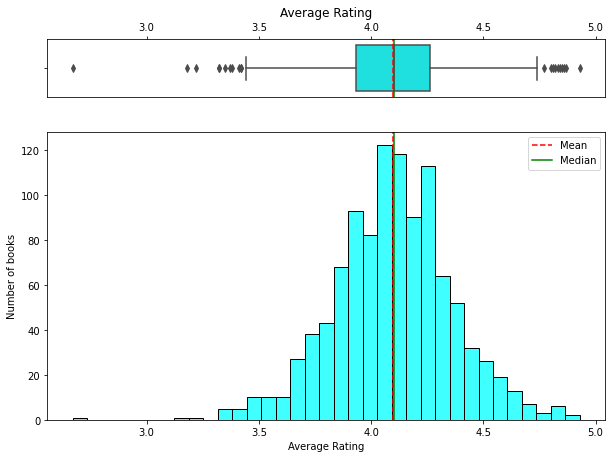

In [9]:
# 3. Visualise the avg_rating distribution.
# boxplot and histogram for average rating

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)}, figsize=(10,7))

mean=preprocessing()['avg_ratings'].mean()
median=preprocessing()['avg_ratings'].median()

sns.boxplot(preprocessing()["avg_ratings"], ax=ax_box, color = 'aqua')
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.xaxis.set_ticks_position('top') 
#ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(preprocessing()["avg_ratings"], ax=ax_hist, color = 'aqua', edgecolor = 'black')
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
#ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(title= 'Average Rating', xlabel='')
ax_hist.set(xlabel='Average Rating', ylabel='Number of books')
plt.show()

/Users/tobiasschulz/opt/anaconda3/envs/machine_learning/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


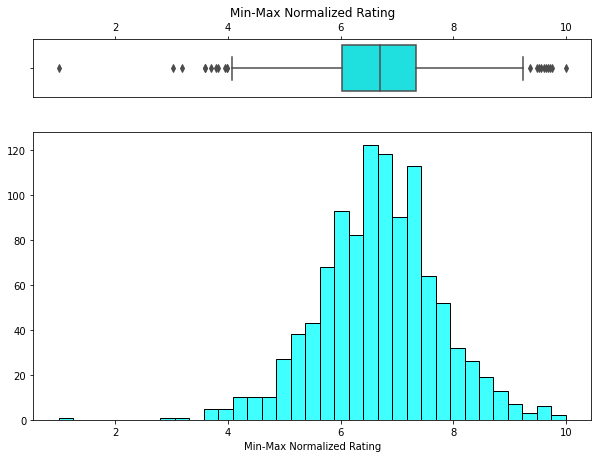

In [10]:
# 4. Visualise the minmax_norm_rating distribution.
#    boxplot and histogram for min-max normalized ratings

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)}, figsize=(10,7))

mean=preprocessing()['minmax_norm_ratings'].mean()
median=preprocessing()['minmax_norm_ratings'].median()

sns.boxplot(preprocessing()["minmax_norm_ratings"], ax=ax_box, color = 'aqua')
#ax_box.axvline(mean, color='r', linestyle='--')
#ax_box.axvline(median, color='g', linestyle='-')
ax_box.xaxis.set_ticks_position('top') 
#ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(preprocessing()["minmax_norm_ratings"], ax=ax_hist, color = 'aqua', edgecolor = 'black')
#ax_hist.axvline(mean, color='r', linestyle='--')
#ax_hist.axvline(median, color='g', linestyle='-')
#ax_hist.axvline(mode, color='b', linestyle='-')

#plt.legend({'Mean':mean,'Median':median})

ax_box.set(title= 'Min-Max Normalized Rating', xlabel='')
ax_hist.set(xlabel='Min-Max Normalized Rating', ylabel='')
plt.show()

/Users/tobiasschulz/opt/anaconda3/envs/machine_learning/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/tobiasschulz/opt/anaconda3/envs/machine_learning/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


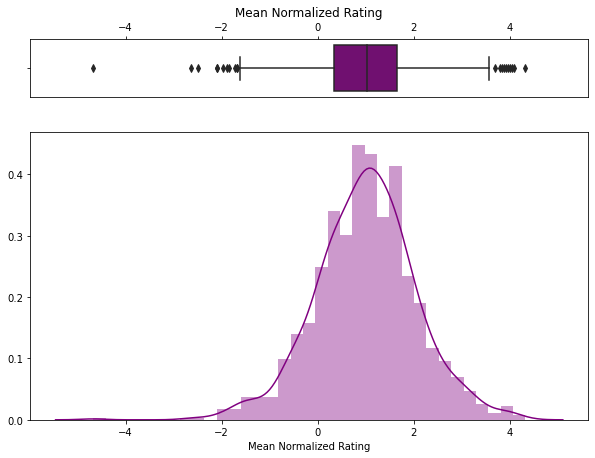

In [11]:
# 5. Visualise the mean_norm_rating distribution.
#    boxplot and histogram for mean normalized ratings

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)}, figsize=(10,7))

mean=preprocessing()['mean_norm_ratings'].mean()
median=preprocessing()['mean_norm_ratings'].median()

sns.boxplot(preprocessing()["mean_norm_ratings"], ax=ax_box, color= 'purple')
#ax_box.axvline(mean, color='r', linestyle='--')
#ax_box.axvline(median, color='g', linestyle='-')
ax_box.xaxis.set_ticks_position('top') 
#ax_box.axvline(mode, color='b', linestyle='-')

sns.distplot(preprocessing()["mean_norm_ratings"], ax=ax_hist,color='purple')
#ax_hist.axvline(mean, color='r', linestyle='--')
#ax_hist.axvline(median, color='g', linestyle='-')
#ax_hist.yaxis()
#ax_hist.axvline(mode, color='b', linestyle='-')

#plt.legend({'Mean':mean,'Median':median})

ax_box.set(title= 'Mean Normalized Rating', xlabel='')
ax_hist.set(xlabel='Mean Normalized Rating', ylabel='')
plt.show()

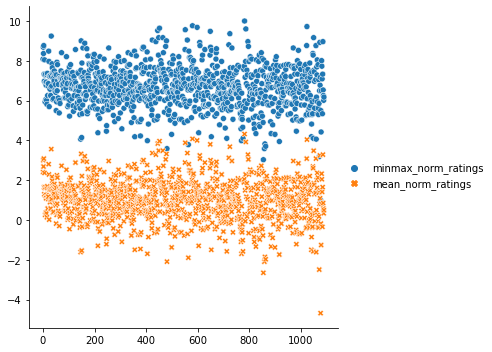

In [12]:
# 6 Create one graph that represents in the same figure both minmax_norm_rating and mean_norm_ratingdistributions.

a = preprocessing()
minmax_mean = a[['minmax_norm_ratings', 'mean_norm_ratings']]
sns.relplot(data=minmax_mean); 

/Users/tobiasschulz/opt/anaconda3/envs/machine_learning/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


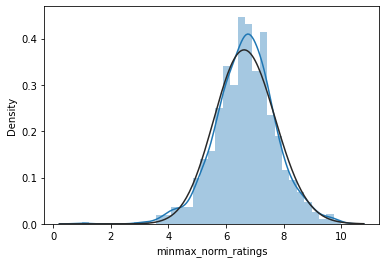

In [13]:
# 7 What is the best fit in terms of a distribution (normal, chi-squared...) to represent each of those graphs?

sns.distplot(minmax_mean.minmax_norm_ratings,fit=stats.gamma);

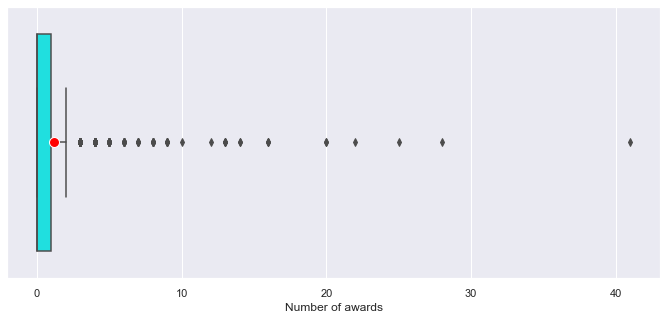

In [14]:
# 8 Visualize the awards distribution in a boxplot and aggregtated bars. 
#   Decide which of these representations gives us more information and in which cases they should be used.

sns.set(rc={'figure.figsize':(11.7,5.0)})

_= sns.boxplot(x=preprocessing()["award_count"],color='aqua', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"red", 
                       "markeredgecolor":"white",
                      "markersize":"10"}, showfliers = True)
_= plt.xlabel('Number of awards')

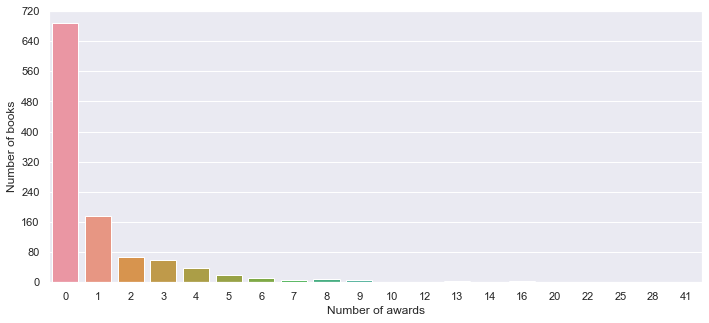

In [15]:
# 8 Visualize the awards distribution in a boxplot and aggregtated bars. 
#   Decide which of these representations gives us more information and in which cases they should be used

dz = preprocessing()['award_count'].value_counts()
dw= dz.sort_index()
dw = pd.DataFrame(dw)
dw.reset_index(inplace=True)
dw = dw.rename(columns = {'index':'award_count', 'award_count': 'num_books'})


ax= plt.figure().gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax= sns.barplot(y=dw['num_books'],x=dw["award_count"])
ax= plt.xlabel('Number of awards')
ax= plt.ylabel('Number of books')



/Users/tobiasschulz/opt/anaconda3/envs/machine_learning/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


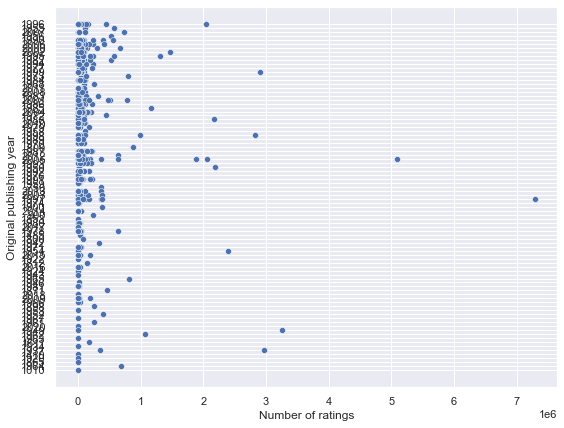

In [16]:
# 9 Now, make a simple plot to visualise the ratings w.r.t. the years!

sns.set(rc={'figure.figsize':(9,7)})


new_df = preprocessing().dropna(subset=['number of ratings', 'original_publish_year'])

_ = sns.scatterplot(new_df["number of ratings"],new_df["original_publish_year"].sort_values() )
#xlabel='Number of rating', ylabel='Original publishing year'
_=plt.xlabel('Number of ratings') 
_=plt.ylabel('Original publishing year');

In [17]:
tt= preprocessing()["original_publish_year"].sort_values()

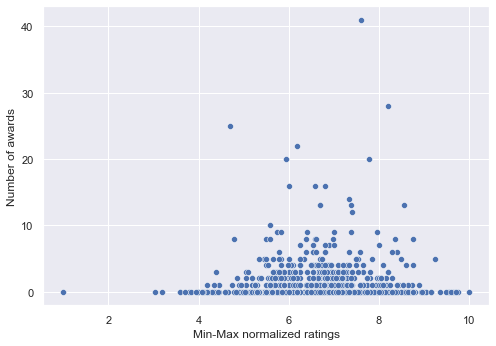

In [18]:
# 10. Make a scatterplot to represent minmax_norm_ratings in function of the number of awards won by the book.

sns.set(rc={'figure.figsize':(8,5.5)})

_= sns.scatterplot(data=preprocessing(), x="minmax_norm_ratings", y="award_count")
_= plt.ylabel("Number of awards")
_= plt.xlabel("Min-Max normalized ratings")

From here just for backup

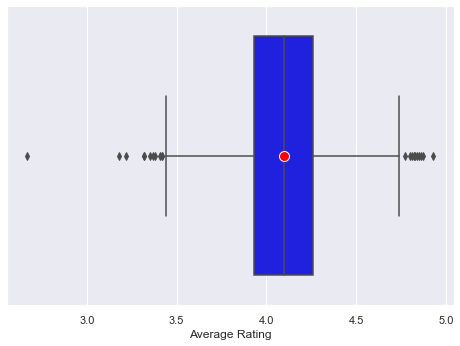

In [19]:
_= sns.boxplot(x=preprocessing()["avg_ratings"],color='blue', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"red", 
                       "markeredgecolor":"white",
                      "markersize":"10"})
_= plt.xlabel('Average Rating')

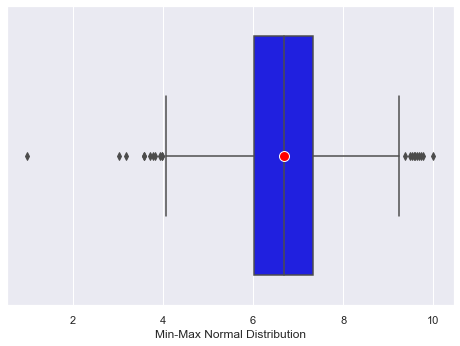

In [20]:
_= sns.boxplot(x=preprocessing()["minmax_norm_ratings"],color='blue', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"red", 
                       "markeredgecolor":"white",
                      "markersize":"10"})
_= plt.xlabel('Min-Max Normal Distribution')

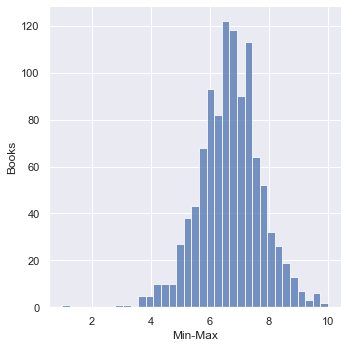

In [21]:
_= sns.displot(preprocessing(), x="minmax_norm_ratings")
_= plt.ylabel("Books")
_= plt.xlabel('Min-Max')

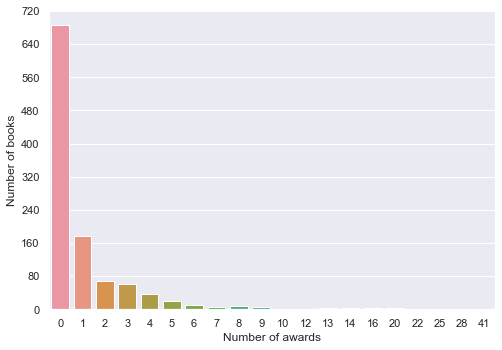

In [22]:
from matplotlib.ticker import MaxNLocator
ax= plt.figure().gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax= sns.barplot(y=dw['num_books'],x=dw["award_count"])
ax= plt.xlabel('Number of awards')
ax= plt.ylabel('Number of books')